Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_excel("/content/HousePricePrediction.xlsx")
# print(type(dataset))
print(dataset.head())
# print(dataset['MSZoning'].unique())
print(dataset.shape," rowsxcolumns")

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  
(2919, 13)  rowsxcolumns


dataset.info()

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [3]:
dataset.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [4]:
print(dataset.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64


Data Preprocessing Steps

In [11]:
obj = (dataset.dtypes == 'object')
# print(len(obj))
obj_col = list(obj[obj].index)
# print(obj_col)
print("Number of categorical columns are : ",len(obj_col))

integer = (dataset.dtypes == 'int')
int_col = list(integer[integer].index)
print("Number of integer columns are : ",len(int_col))

f1 = (dataset.dtypes == 'float')
f1_col = list(f1[f1].index)
print("Number of floating point columns are : ",len(f1_col))

print(f"A total of {len(obj_col)+len(int_col)+len(f1_col)} columns ")

Number of categorical columns are :  4
Number of integer columns are :  6
Number of floating point columns are :  3
A total of 13 columns 


Exploratory Data analysis

Finding correlation between all the numerica columns.

<Axes: >

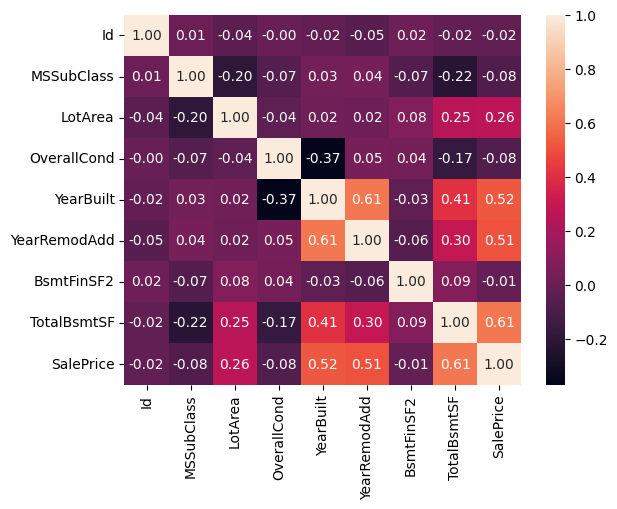

In [6]:
# numerical_data = dataset.select_dtypes(include = ['number'])
# print(numerical_data)                             #Long way
# x = numerical_data.corr()

sns.heatmap(dataset.corr(numeric_only=True),      #Direct way
            annot = True,
            # linewidths = 2,
            fmt = '.2f')

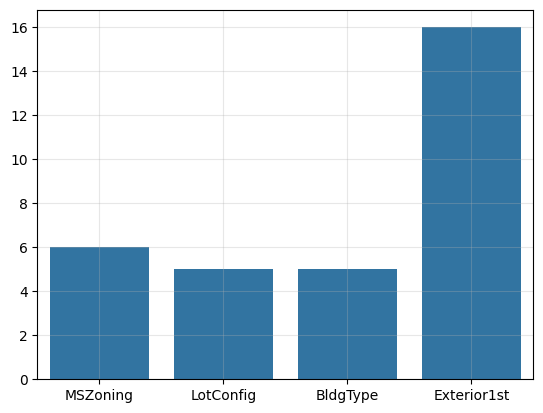

In [9]:
unique_values = []

for col in obj_col:
  unique_values.append(dataset[col].unique().size)
# print(unique_values)
sns.barplot(x=obj_col,y=unique_values)
plt.grid(alpha = 0.3)
plt.show()

The plot shows that Exterior1st has around 16 categories and other features have around 6 unique categories.

To find out the actual count if each category we can plot the bargraph of each four features separately

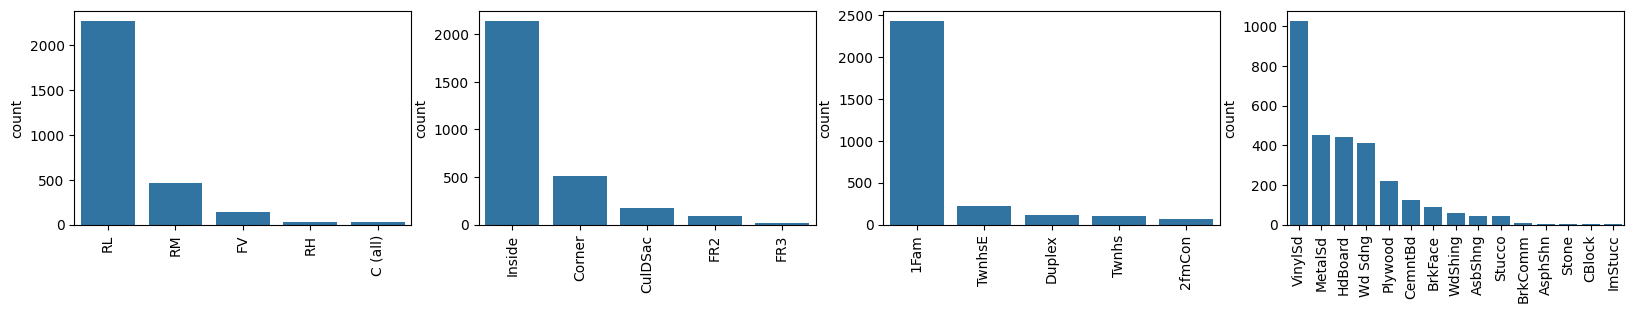

In [9]:
plt.figure(figsize=(20,36))

index = 1
for col in obj_col:
  y = dataset[col].value_counts()       #value_count() function counts the individual elements
  plt.subplot(11,4, index)              # has to display 4 sub pictures
  plt.xticks(rotation=90)               #to rotate the label
  sns.barplot(x=list(y.index), y=y)     #x[0]~y, x[1]~y
  index += 1




---
From Here:

ML related Stuff

DATA CLEANING
For the prediction process

In [12]:
print(dataset.shape)
print()
print(dataset.columns)
print()
print(dataset.info())
print()
print(dataset.isnull().sum())

(2919, 13)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), in

1. Id will not take part in any prediction so we can drop it
2. We will fill the null values of SalePice column with the mean of the column.
Since SalePrice is an important column for training we cannot remove the entire column ignorantly

In [13]:
dataset.drop(['Id'], axis=1, inplace=True)
dataset                                       #id dropped

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN


In [14]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())


The above code will fill null values with the mean of the entire column

In [16]:
new_data = dataset.dropna()        #This function will drop any null rows, since we don't have many rows with null value it will not effect much
print(new_data)
print(new_data.isnull().sum())     #Checks any null values for confirmation

      MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  YearBuilt  \
0             60       RL     8450    Inside     1Fam            5       2003   
1             20       RL     9600       FR2     1Fam            8       1976   
2             60       RL    11250    Inside     1Fam            5       2001   
3             70       RL     9550    Corner     1Fam            5       1915   
4             60       RL    14260       FR2     1Fam            5       2000   
...          ...      ...      ...       ...      ...          ...        ...   
2914         160       RM     1936    Inside    Twnhs            7       1970   
2915         160       RM     1894    Inside   TwnhsE            5       1970   
2916          20       RL    20000    Inside     1Fam            7       1960   
2917          85       RL    10441    Inside     1Fam            5       1992   
2918          60       RL     9627    Inside     1Fam            5       1993   

      YearRemodAdd Exterior

Finally we have no null values, Now we can do further Process.

---

NOW use OneHotEncoder to convert categorical data into numeric data.

Definition: "One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, we can easily convert object data into int. So for that, firstly we have to collect all the features which have the object datatype. To do so, we will make a loop"

In [17]:
from sklearn.preprocessing import OneHotEncoder as ohe
# print(type(new_data))
obj = (new_data.dtypes == 'object')
obj_col = list(obj[obj].index)

print("Categorical columns are : ",obj_col)
print("Number of columns are : ",len(obj_col))

Categorical columns are :  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
Number of columns are :  4


In [18]:
OH_encoder = ohe(sparse_output = False, handle_unknown = 'ignore')
# print(OH_encoder)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_data[obj_col]))
OH_cols.index = new_data.index
OH_cols.columns = OH_encoder.get_feature_names_out()

df_final = new_data.drop(obj_col, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

Splitting data into training and testing


In [19]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

x_train, x_valid, y_train, y_valid = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)



For Model building you can take any model as long as that model takes continuous values. For example if you use DecisionTreeClassifier it will expect you to give inout in discrete values so instead use DecisionTreeRegressor

Calculatng the Mean Absolute Error of various models.


---


Using SVM model built

In [20]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train, y_train)
y_pred = model_SVR.predict(x_valid)
print(mean_absolute_percentage_error(y_valid, y_pred))

0.1870512931870423




---

Using Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(x_train, y_train)
y_pred = model_RFR.predict(x_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.1880749687300303




---


Using Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(x_train, y_train)
y_pred = model_LR.predict(x_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.1874168384159986




---

Using decision Tree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor

model_DTR = DecisionTreeRegressor()
model_DTR.fit(x_train, y_train)
y_pred = model_DTR.predict(x_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.21948223653897464


If you are using colab like me then you'll have to install catboost package into your colab to use catboost algorithm.

In [24]:
# pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


Using CatBoostRegressor

In [25]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

cb_model = CatBoostRegressor()
cb_model.fit(x_train, y_train)
preds = cb_model.predict(x_valid)

cb_r2_score = r2_score(y_valid, preds)
cb_r2_score

Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 48.6ms	remaining: 48.6s
1:	learn: 55780.1567575	total: 50.5ms	remaining: 25.2s
2:	learn: 55060.9599505	total: 52.2ms	remaining: 17.3s
3:	learn: 54456.1126921	total: 53.8ms	remaining: 13.4s
4:	learn: 53901.1464265	total: 55.3ms	remaining: 11s
5:	learn: 53334.6062357	total: 57ms	remaining: 9.44s
6:	learn: 52824.4943646	total: 58.6ms	remaining: 8.31s
7:	learn: 52381.4267520	total: 60.3ms	remaining: 7.47s
8:	learn: 51841.0364316	total: 61.8ms	remaining: 6.8s
9:	learn: 51281.5852560	total: 63.4ms	remaining: 6.28s
10:	learn: 50825.3817438	total: 65ms	remaining: 5.84s
11:	learn: 50477.2609796	total: 66.7ms	remaining: 5.49s
12:	learn: 50081.4097641	total: 68.4ms	remaining: 5.19s
13:	learn: 49663.6380360	total: 70.4ms	remaining: 4.96s
14:	learn: 49334.5782662	total: 71.7ms	remaining: 4.71s
15:	learn: 48967.5221026	total: 73.4ms	remaining: 4.52s
16:	learn: 48676.4063222	total: 75.3ms	remaining: 4.35s
17:	learn: 48359.1169955	total: 76.

0.38351169878113034

CONCLUSION : Now after observing all the mean_absolute_percentage_error we can conclude the SVM is giving us much better result as it's error is average ~0.18 (approx)